# ṢONG POPULARITY ANALYSIS

# **Problem Statement**

As a data scientist at a music streaming company, your task is to analyze the key musical and platform-related features that influence a song's popularity in 2023.

The goal is to build a data-driven model that can:

>Predict the popularity of a song based on its audio features and platform presence.

>Provide actionable insights to the marketing and A&R (Artist & Repertoire) teams on what attributes contribute most to high streaming performance.

Your analysis will also help guide:

>Playlist inclusion decisions,

>Cross-platform promotion strategies, and

>Talent scouting efforts based on song and artist characteristics.

Dataset Source:[Kaggle - Most Streamed Spotify Songs 2023](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)


# 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate

# 2. Import Dataset and Data Cleaning

In [3]:
df = pd.read_csv(('spotify-2023.csv'), encoding='latin1')

In [4]:
df.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [5]:
print(df.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [6]:
df.count()

track_name              953
artist(s)_name          953
artist_count            953
released_year           953
released_month          953
released_day            953
in_spotify_playlists    953
in_spotify_charts       953
streams                 953
in_apple_playlists      953
in_apple_charts         953
in_deezer_playlists     953
in_deezer_charts        953
in_shazam_charts        903
bpm                     953
key                     858
mode                    953
danceability_%          953
valence_%               953
energy_%                953
acousticness_%          953
instrumentalness_%      953
liveness_%              953
speechiness_%           953
dtype: int64

In [7]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

### Steps Completed So Far

- Checked the **features (columns)** of the dataset  
- Counted the **number of values** in each column  
- Identified the **number of null values** in each column  


In [8]:
df['in_shazam_charts'].unique()

array(['826', '382', '949', '548', '425', '946', '418', '194', '953',
       '339', '251', '168', '1,021', '1,281', nan, '187', '0', '1,173',
       '29', '150', '73', '139', '1,093', '96', '211', '325', '294',
       '197', '27', '310', '354', '184', '212', '81', '82', '100', '62',
       '69', '727', '311', '1,133', '102', '332', '259', '140', '16',
       '110', '810', '176', '615', '210', '216', '215', '167', '37',
       '171', '272', '529', '26', '5', '169', '230', '84', '154', '93',
       '115', '72', '8', '323', '49', '1,451', '1,170', '429', '162',
       '10', '478', '236', '200', '78', '266', '486', '204', '34', '202',
       '312', '32', '153', '519', '458', '48', '666', '14', '925', '88',
       '203', '44', '74', '638', '64', '71', '2', '3', '136', '148', '22',
       '368', '1', '189', '52', '9', '31', '66', '208', '28', '558',
       '195', '13', '60', '503', '56', '15', '454', '40', '285', '129',
       '58', '117', '47', '20', '30', '80', '263', '116', '57', '39',
  

What we can do here is:

- Convert all values to **integers**  
- Remove the **commas** from the values  
- Replace all **NaN values with 0**, assuming that those songs have not been charted  


One thing is, NaN cannot be converted to an integer type because NaN is a "Float" concept.

So, we will be converting all the features into float tyoe instead of integer.

In [9]:
df['in_shazam_charts'] = (
    df['in_shazam_charts']
    .str.replace(',', '', regex=False)
    .astype(float)
    .fillna(0)
)

df['in_shazam_charts'].dtype

dtype('float64')

In [10]:
df['key'].unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', nan, 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

In [11]:
df[df['key'].isna()][['track_name', 'bpm', 'danceability_%', 'streams']].head()

,track_name,bpm,danceability_%,streams
12,Flowers,118,71,1316855716
17,What Was I Made For? [From The Motion Picture ...,78,44,30546883
22,I Wanna Be Yours,135,48,1297026226
35,Los del Espacio,120,81,123122413
44,Barbie World (with Aqua) [From Barbie The Album],144,77,65156199


### What did I do with the above outputs?

- The `key` column had 95 missing values out of 953 songs.
- All the keys mentioned are in the Western Scale, but we are missing the C scale.
- Upon inspection using Google, all missing entries belonged to songs known to be in the key of **C** (major or minor).

> Yes, a lot of real world data questions like these can be clarified using Google Search and AI,nothing wrong with it. I searched for the songs that were shown in the output, every song has a C Minor or Major key.

- We filled all missing `key` values with `'C'` to complete the 12-key coverage in Western music.
- The `mode` column (0 for minor, 1 for major) is retained as-is for future optional analysis.
- This will maintain the **balance** and **completeness** of the key distribution in the dataset

In [12]:
df['key'] = df['key'].fillna('C')
df['key'].dtype

dtype('O')

In [13]:
df[df['key'] == 'C'][['track_name', 'mode']]

,track_name,mode
12,Flowers,Major
17,What Was I Made For? [From The Motion Picture ...,Major
22,I Wanna Be Yours,Minor
35,Los del Espacio,Major
44,Barbie World (with Aqua) [From Barbie The Album],Major
...,...,...
899,Hold Me Closer,Major
901,After LIKE,Major
903,B.O.T.A. (Baddest Of Them All) - Edit,Major
938,Labyrinth,Major


In [14]:
df.count()

track_name              953
artist(s)_name          953
artist_count            953
released_year           953
released_month          953
released_day            953
in_spotify_playlists    953
in_spotify_charts       953
streams                 953
in_apple_playlists      953
in_apple_charts         953
in_deezer_playlists     953
in_deezer_charts        953
in_shazam_charts        953
bpm                     953
key                     953
mode                    953
danceability_%          953
valence_%               953
energy_%                953
acousticness_%          953
instrumentalness_%      953
liveness_%              953
speechiness_%           953
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    object 
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

From the above output, we observe that some columns have an object (string) data type. Since most machine learning models require numerical input, it's important to convert these object or string types into numeric formats such as integers or floats before training.

In [16]:
df.select_dtypes(include='object').columns

Index(['track_name', 'artist(s)_name', 'streams', 'in_deezer_playlists', 'key',
       'mode'],
      dtype='object')

In [17]:
for col in df.select_dtypes(include='object').columns:
    print(f"\n🔹 {col} ({df[col].nunique()} unique values):\n{df[col].unique()}")


🔹 track_name (943 unique values):
['Seven (feat. Latto) (Explicit Ver.)' 'LALA' 'vampire' 'Cruel Summer'
 'WHERE SHE GOES' 'Sprinter' 'Ella Baila Sola' 'Columbia' 'fukumean'
 'La Bebe - Remix' 'un x100to' 'Super Shy' 'Flowers' 'Daylight'
 'As It Was' 'Kill Bill' 'Cupid - Twin Ver.'
 'What Was I Made For? [From The Motion Picture "Barbie"]' 'Classy 101'
 'Like Crazy' 'LADY GAGA'
 'I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From The ' 'I Wanna Be Yours'
 'Peso Pluma: Bzrp Music Sessions, Vol. 55'
 'Popular (with Playboi Carti & Madonna) - The Idol Vol. 1 (Music from the HBO Original Series)'
 'SABOR FRESA' 'Calm Down (with Selena Gomez)' 'MOJABI GHOST' 'Last Night'
 'Dance The Night (From Barbie The Album)' 'Rush' 'TULUM' "Creepin'"
 'Anti-Hero' 'TQG' 'Los del Espacio' 'Frï¿½ï¿½gil (feat. Grupo Front'
 'Blank Space' 'Style' 'TQM' 'El Azul'
 'Sunflower - Spider-Man: Into the Spider-Verse' "I'm Good (Blue)"
 'See You Again' 'Barbie World (with Aqua) [From Barbie The Album]'
 'Angels Like Y

In the above output, there's a weird entry in the streams column. Since it's just one row, we can simply check which row it is and delete it entirely.

In [18]:
df['in_deezer_playlists'] = (
    df['in_deezer_playlists']
    .str.replace(',', '', regex=False)
    .astype(int)
)

df['in_deezer_playlists'].dtype

dtype('int64')

In [19]:
df[df['streams'].astype(str).str.contains('BPM')]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,110,A,Major,53,75,69,7,0,17,3


In [20]:
df = df.drop(574)

Now we convert the object type to numeric type

In [21]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

We encode the key and mode features since they have a limited number of unique values but can still play an important role during model training.

In [22]:
le = LabelEncoder()
df['key_encoded'] = le.fit_transform(df['key'])

In [23]:
if df['mode'].dtype == 'object':
    df['mode'] = df['mode'].map({'Major': 1, 'Minor': 0})

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    int64  
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    int64  
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      952 non-null    float64
 14  bpm                   952 non-null    int64  
 15  key                   952 no

In [33]:
df["in_deezer_playlists"].unique()

array([   45,    58,    91,   125,    87,    88,    43,    30,    48,
          66,    54,    21,   745,   182,   863,   161,    78,    95,
          23,    10,    42,   582,    32,   318,    41,    15,   143,
          50,    13,   245,   165,   184,    34,    24,   410,   151,
           6,   843,   537,   247,    65,   138,   458,  2445,    74,
          57,   213,   109,  3394,  3421,    39,   142,    73,   102,
           4,    89,  4053,   169,    31,     8,   707,  1056,   164,
        4095,    68,   331,    80,    18,  1003,    71,    25,     5,
         798,   110,  1800,   141,  2703,    35,    29,     0,    69,
          63,  1632,   163,    19,    59,  2394,  1034,   327,  2163,
         695,  2655,   476,   145,    47,    61,   246,    38,    52,
        6551,  1212,  1078,     7,   282,   254,   588,     1,  2094,
        2969,    26,  3889,    99,  5239,    44,     3,   974,   356,
          12,   453,  3631,   113,   112,   435,   929,   939,  4607,
         806,   885,

In [25]:
df["in_deezer_playlists"].value_counts()

in_deezer_playlists
0      24
15     23
5      20
13     20
12     18
       ..
270     1
125     1
863     1
328     1
745     1
Name: count, Length: 348, dtype: int64

In [26]:
df["in_deezer_playlists"].fillna(0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18860\3218994648.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["in_deezer_playlists"].fillna(0, inplace=True)



We filled the missing values in in_deezer_playlists with 0 because it likely means the song wasn't added to any Deezer playlist. This way, we keep all rows and still make the data usable for the model.

In [27]:
df.drop(["track_name", "artist(s)_name"], axis=1, inplace=True)

We dropped the artist(s)_name column because it has too many unique values and is hard to use in a model. Instead, we kept artist_count, which tells us how many artists worked on a song. This gives a clear idea of whether it's a solo or a collaboration, which can still be useful for the model.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist_count          952 non-null    int64  
 1   released_year         952 non-null    int64  
 2   released_month        952 non-null    int64  
 3   released_day          952 non-null    int64  
 4   in_spotify_playlists  952 non-null    int64  
 5   in_spotify_charts     952 non-null    int64  
 6   streams               952 non-null    int64  
 7   in_apple_playlists    952 non-null    int64  
 8   in_apple_charts       952 non-null    int64  
 9   in_deezer_playlists   952 non-null    int64  
 10  in_deezer_charts      952 non-null    int64  
 11  in_shazam_charts      952 non-null    float64
 12  bpm                   952 non-null    int64  
 13  key                   952 non-null    object 
 14  mode                  952 non-null    int64  
 15  danceability_%        952 no

# 3. Feature Selection:

Saving the cleaned data for the model training.

In [29]:
model_train_df = df.drop(columns=["key"])

In [30]:
df.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded
0,2,2023,7,14,553,147,141381703,43,263,45,...,B,1,80,89,83,31,0,8,4,2
1,1,2023,3,23,1474,48,133716286,48,126,58,...,C#,1,71,61,74,7,0,10,4,4
2,1,2023,6,30,1397,113,140003974,94,207,91,...,F,1,51,32,53,17,0,31,6,8
3,1,2019,8,23,7858,100,800840817,116,207,125,...,A,1,55,58,72,11,0,11,15,0
4,1,2023,5,18,3133,50,303236322,84,133,87,...,A,0,65,23,80,14,63,11,6,0


In [31]:
model_train_df.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_encoded
0,2,2023,7,14,553,147,141381703,43,263,45,...,125,1,80,89,83,31,0,8,4,2
1,1,2023,3,23,1474,48,133716286,48,126,58,...,92,1,71,61,74,7,0,10,4,4
2,1,2023,6,30,1397,113,140003974,94,207,91,...,138,1,51,32,53,17,0,31,6,8
3,1,2019,8,23,7858,100,800840817,116,207,125,...,170,1,55,58,72,11,0,11,15,0
4,1,2023,5,18,3133,50,303236322,84,133,87,...,144,0,65,23,80,14,63,11,6,0


In [32]:
model_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist_count          952 non-null    int64  
 1   released_year         952 non-null    int64  
 2   released_month        952 non-null    int64  
 3   released_day          952 non-null    int64  
 4   in_spotify_playlists  952 non-null    int64  
 5   in_spotify_charts     952 non-null    int64  
 6   streams               952 non-null    int64  
 7   in_apple_playlists    952 non-null    int64  
 8   in_apple_charts       952 non-null    int64  
 9   in_deezer_playlists   952 non-null    int64  
 10  in_deezer_charts      952 non-null    int64  
 11  in_shazam_charts      952 non-null    float64
 12  bpm                   952 non-null    int64  
 13  mode                  952 non-null    int64  
 14  danceability_%        952 non-null    int64  
 15  valence_%             952 no

# 4. Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps us understand the dataset deeply before building any model. It lets us:

- Spot patterns and trends  
- Detect outliers and skewed distributions  
- Understand which features are important  
- Form data-driven hypotheses

### In this part, the questions we are tackling are:
- What is the overall distribution of the target variable (streams)?
- Are some musical/audio features (like danceability, energy, valence) highly related to popularity?
- Do certain months, keys, modes or bpm ranges lead to more popular songs?
- Are there any strong correlations between features?
- Do platform variables (e.g., Spotify playlists, Apple charts) actually influence popularity?


What does the streams distribution look like?

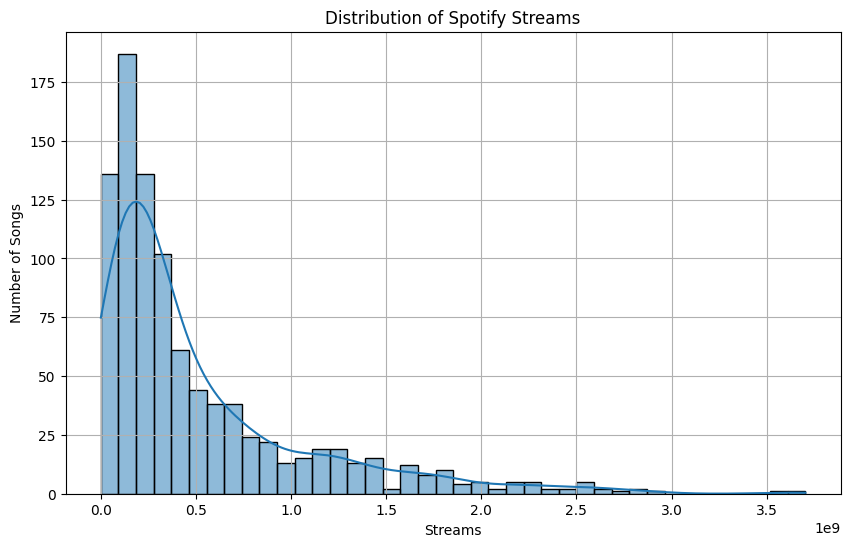

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(df['streams'], kde=True, bins=40)
plt.title("Distribution of Spotify Streams")
plt.xlabel("Streams")
plt.ylabel("Number of Songs")
plt.grid(True)
plt.show()

Explanation:

The target variable streams is highly right-skewed, i.e., a few songs have very high streams, while most have lower values.
This tells us that stream counts vary a lot, and we may want to log-transform this variable for modeling later.

 Correlation Heatmap — Which features are strongly related to streams?

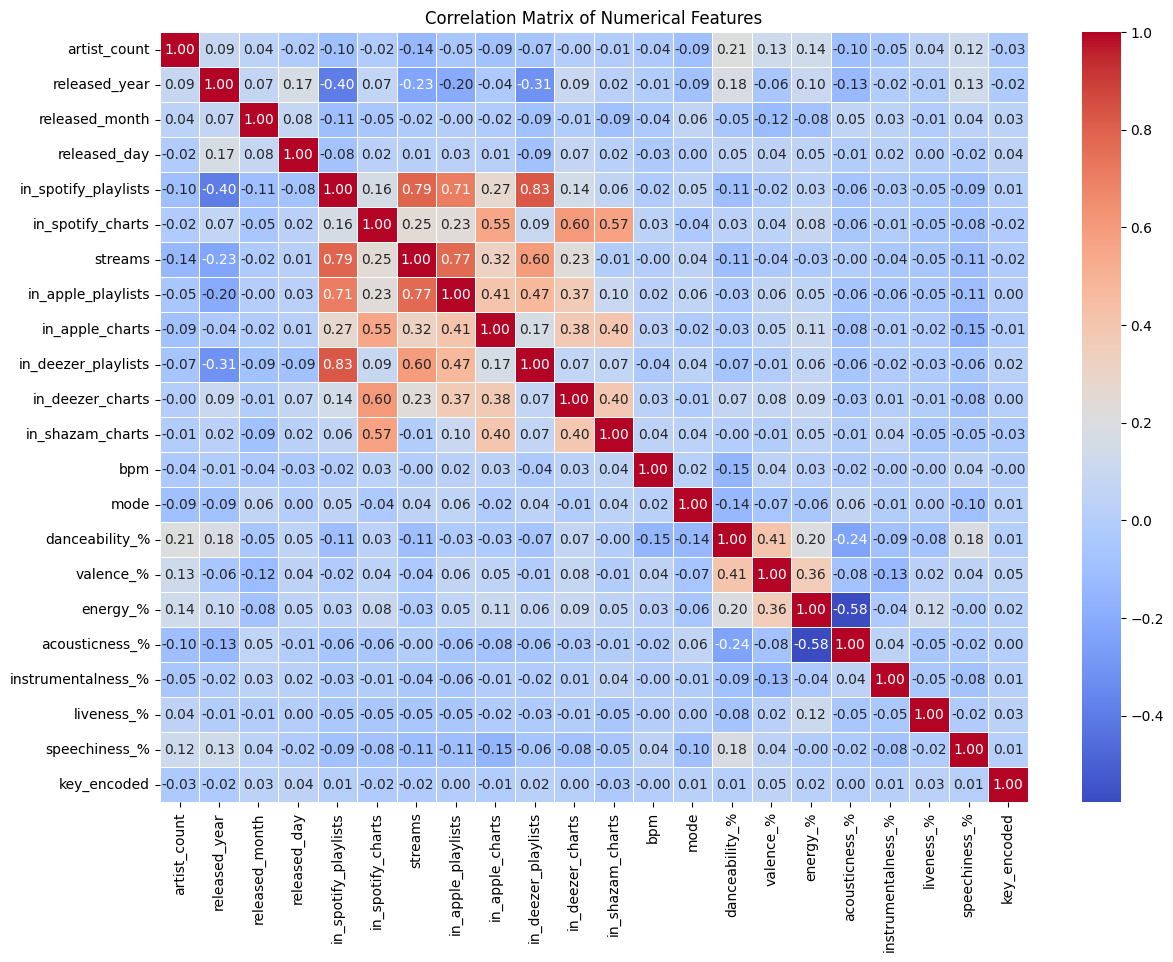

In [34]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

### Correlation Matrix Explanation
This matrix shows how different features are related to each other. Values close to 1 mean strong positive correlation, values close to -1 mean strong negative correlation, and values near 0 indicate no strong relation.

We’re mainly checking which features are closely related to streams, our target variable.

Key observations:

- streams has a high positive correlation with in_spotify_playlists, in_spotify_charts, and decent relation with other platform stats like Apple and Shazam.

- Features like instrumentalness_% and acousticness_% are negatively related to popularity.

- speechiness_%, liveness_%, and key_encoded don’t show strong correlation and might not help much in prediction.


Do audio features like danceability, energy, valence affect streams?

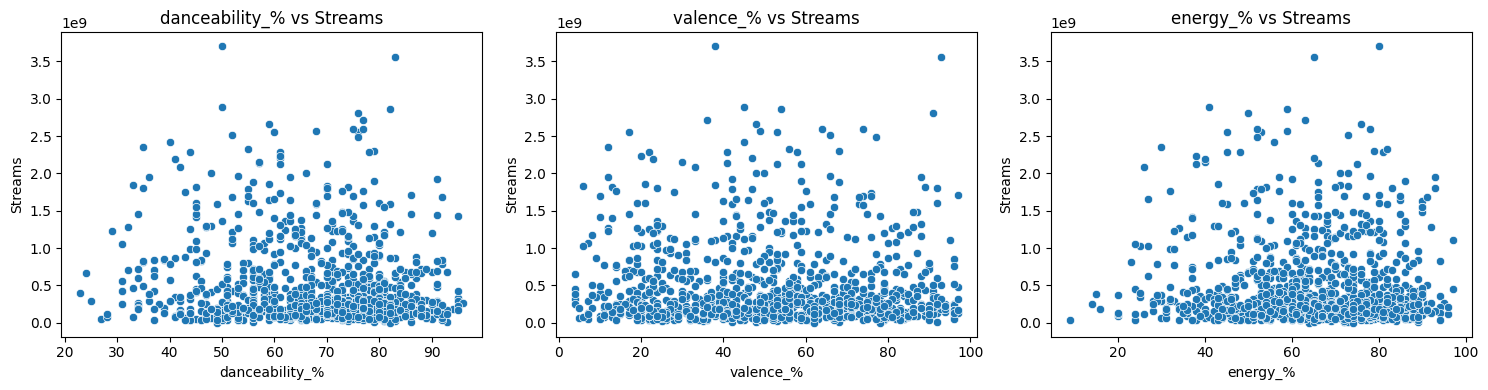

In [35]:
features_to_plot = ['danceability_%', 'valence_%', 'energy_%']
plt.figure(figsize=(15,4))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=df, x=feature, y='streams')
    plt.title(f"{feature} vs Streams")
    plt.xlabel(feature)
    plt.ylabel("Streams")
plt.tight_layout()
plt.show()

### Explanation:
- These scatter plots show how danceability, valence, and energy relate to the number of streams.
- We are checking if higher values in these features lead to more streams.
- There doesn’t seem to be a very strong trend, but we do see that most high-stream songs fall in the mid-to-high range of these features.
- This suggests that while these features alone may not strongly predict popularity, they could still contribute when combined with other factors.


Do key, mode, or bpm influence popularity?

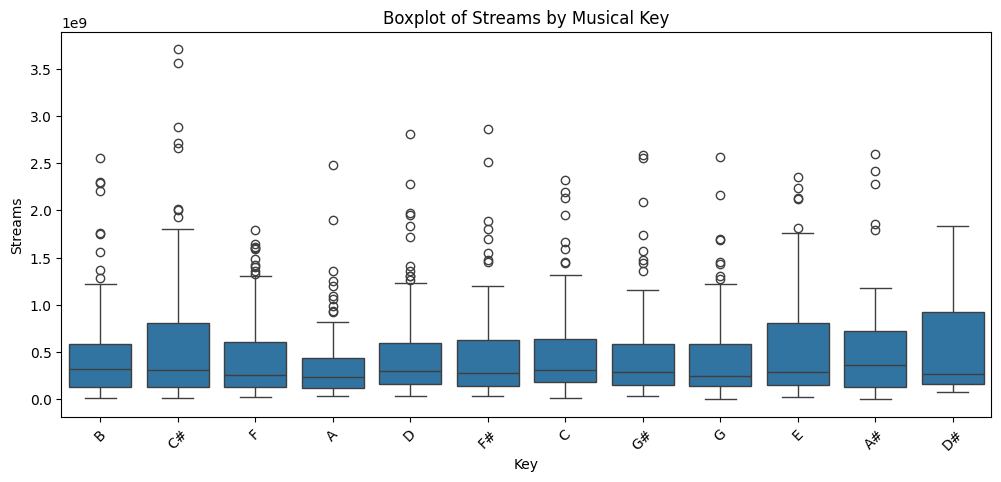

In [36]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='key', y='streams')
plt.title("Boxplot of Streams by Musical Key")
plt.xlabel("Key")
plt.ylabel("Streams")
plt.xticks(rotation=45)
plt.show()

#### Streams by Musical Key
This graph shows how many streams songs got based on their musical key (like C, D#, etc.).
- Each box tells us what the typical stream numbers look like for songs in that key.
- Dots above the box are songs that got a lot more streams than usual.
- For example, keys like C# and E seem to have some songs with very high streams.
- But overall, the number of streams doesn’t change too much based on the key.

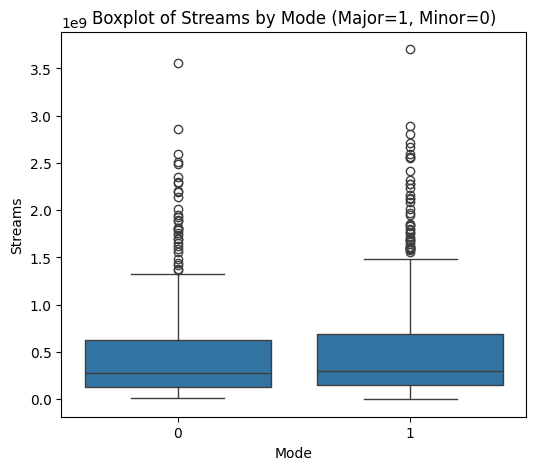

In [37]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='mode', y='streams')
plt.title("Boxplot of Streams by Mode (Major=1, Minor=0)")
plt.xlabel("Mode")
plt.ylabel("Streams")
plt.show()

#### Streams by Mode (Major or Minor)
This graph compares songs in major and minor scales.
- It shows how many streams each group got.
- Both types have similar results, but major mode songs (marked as 1) have a few more songs that got very high streams.

So, being in a major key might help a little, but it’s not a big factor alone.

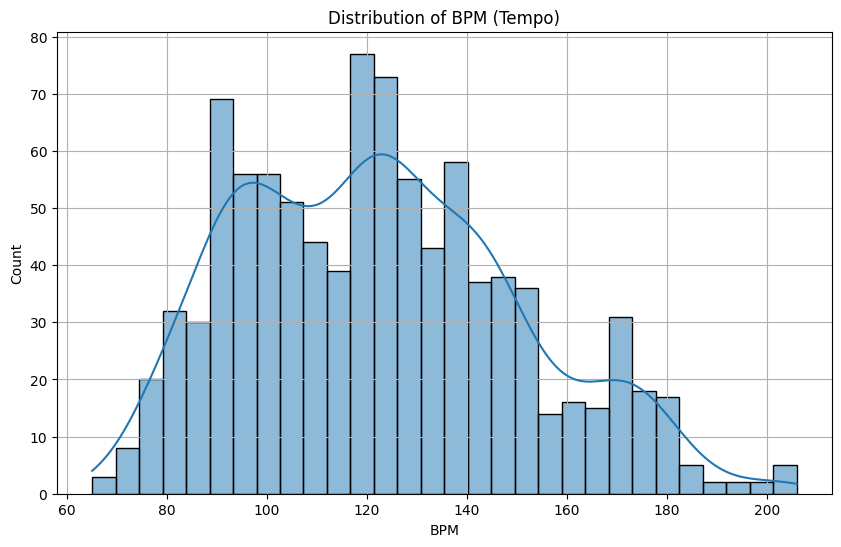

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(df['bpm'], bins=30, kde=True)
plt.title("Distribution of BPM (Tempo)")
plt.xlabel("BPM")
plt.grid(True)
plt.show()

#### BPM (Tempo) Distribution
This graph shows how fast or slow most songs are.
- BPM means beats per minute (how fast the music is).
- Most songs are between 80 and 140 BPM, with many around 120 BPM.
- Very few songs go above 160 BPM.

This tells us that most popular songs are in a medium tempo range — not too slow, not too fast.

Does the release month affect popularity?




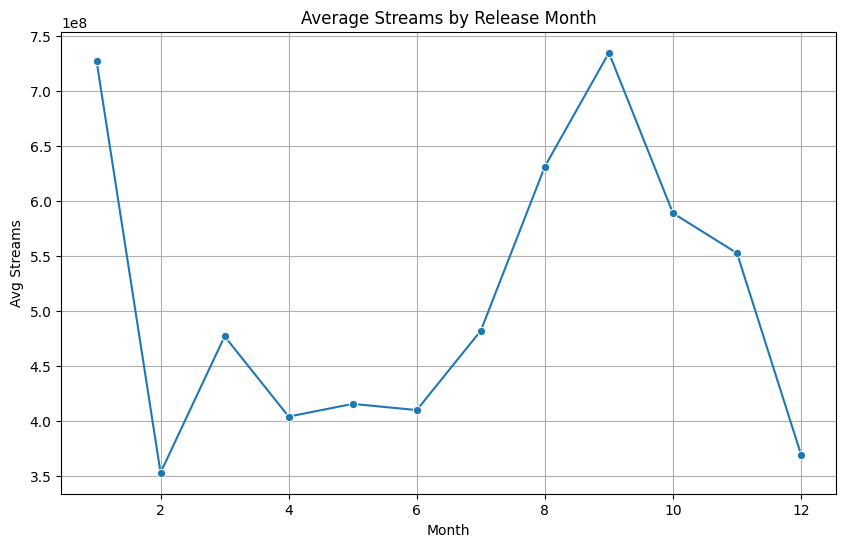

In [39]:
monthly_avg = df.groupby("released_month")["streams"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_avg, x="released_month", y="streams", marker='o')
plt.title("Average Streams by Release Month")
plt.xlabel("Month")
plt.ylabel("Avg Streams")
plt.grid(True)
plt.show()

#### Average Streams by Release Month
This line graph shows the average number of streams for songs released in each month.

- We can see that songs released in January and September had the highest average streams.

- There’s also a noticeable dip in February and December.

- This could be due to seasonal trends, festivals, or industry release cycles where more high-profile tracks drop at the beginning or end of quarters.

Even though we dropped artist names, these trends might still reflect the influence of big-name artists releasing music during certain months. So, while the pattern is useful, we must be cautious in over-interpreting it without deeper artist-level data.

#### A Note:
We intentionally removed complex artist- or track-level text features to keep the project beginner-friendly. Our goal was to walk through the data science lifecycle in a way that’s easy to understand. While we haven’t applied NLP or artist popularity rankings here, those would definitely enhance insights in a production-level setup.

### **Business Impact (for the A&R & Marketing Teams):**
- A&R Teams can strategically plan artist launches during higher-performing months to increase exposure and maximize streaming numbers.

- Marketing Teams can align campaigns and playlist placements around these periods to take advantage of naturally higher listener engagement.

- These insights help optimize resource allocation, ensuring that strong tracks aren’t released during low-performing months unless they have sufficient backing or exclusivity deals.

In short, this type of analysis helps A&R teams time releases better and increase the chances of a song becoming a hit.

Platform Influence — Does presence on playlists/charts boost streams?

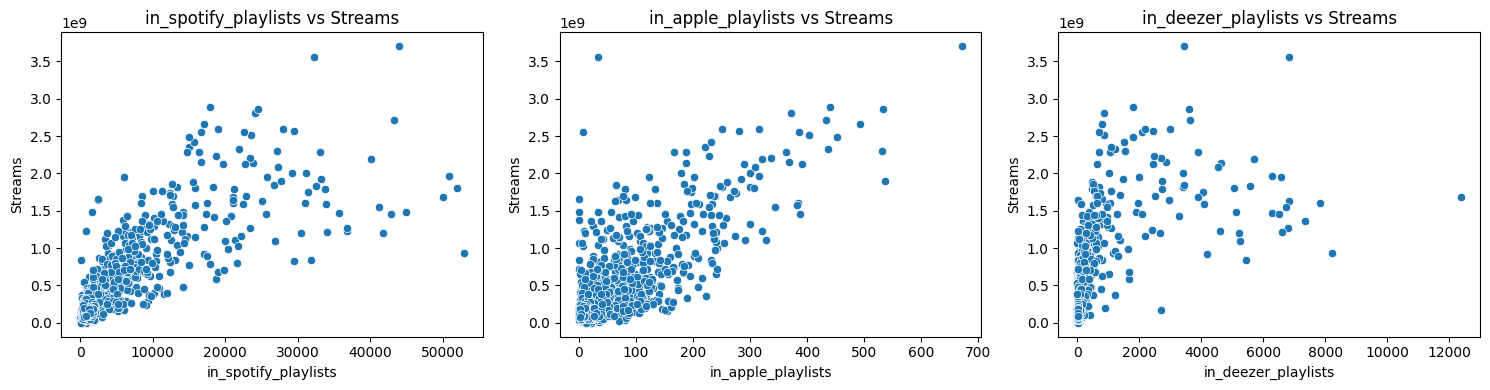

In [40]:
platform_features = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
plt.figure(figsize=(15,4))
for i, feature in enumerate(platform_features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=df, x=feature, y='streams')
    plt.title(f"{feature} vs Streams")
    plt.xlabel(feature)
    plt.ylabel("Streams")
plt.tight_layout()
plt.show()

In the above scatter plots, we’re checking if there’s a link between how many playlists a song appears in and how many streams it gets.

- Spotify: We can clearly see that songs in more Spotify playlists generally get more streams. The trend is quite strong here.

- Apple Music: A similar trend appears—more playlists, more streams. But the spread is a bit wider.

- Deezer: This one’s a little less clear, probably due to fewer songs having large Deezer presence.

- What this means:  
Songs that appear in more playlists tend to be streamed more. So it makes sense to push for higher playlist visibility, especially on Spotify and Apple Music.

### **For the Marketing Team:**
Should focus on getting tracks featured in popular playlists, especially on Spotify, since the impact on streams is clearly visible.


## Wrapping up EDA:
We explored the dataset in detail through various visualizations and analysis. From the EDA, we were able to understand how different musical and platform-related features influence the number of streams a song gets. Based on that, we now have enough insights and clarity to move to the next step — building a model that can predict a song’s popularity.

The goal now is to use what we’ve understood from the data and train a model that can make useful predictions and guide decision-making.

# 4. Train - Test Split

Before building our model, we need to split the data into training and testing sets. The model will learn patterns from the training set, and we’ll use the testing set to check how well it performs on unseen data.

We typically use an 80–20 or 70–30 split. Let’s go with 80% training and 20% testing here.

In [41]:
X = model_train_df.drop('streams', axis=1)
y = model_train_df['streams']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Model Selection & Model Training – What a Data Scientist Should Think Before Choosing a Mode

Before Choosing a Model**
- Before randomsly selecting a model, it is important to ask some key questions, this is what a data scientist actually does in real-world scenarios. We should never run models blindly.

**Q1. What are we trying to do?**
- We are trying to predict the popularity of a song by the number of streams using the audio features and platform-related statistics.
- So, this is clearly a "REGRESSION" problem, because the output "STREAMS" is a continuous number and not a label like yes or no used in classification.

#### **Q2. What do we know about the data?**
- We have around 95o rows, which is a small to medium dataset.
- We are done with cleaning and pre-processing of the data.
- The dataset has a mix of numeric features and a few categorical features, but we encoded them.
- We don't know if the data has a linear relationship or something more complex.

#### **Q3. What do we want out of the model?**
As a company, we should care about 2 things:
- Understanding what influences popularity, i.e., we need something interpretable.
- We also need good performance, i.e., getting good predictions.

#### **The plan:**
- We use 3 models:
- Linear Regression: It is the simplest and gives a good baseline; it will also help us to understand the relationship of the data and feature impact.
- Random Forest - It works well to find non-linear patterns and gives feature importance too.
- XGBoost: It is considered one of the best models. We can utilize this if we want to push for performance and further optimize.

We won’t delve into overly complex models like neural networks here, as our dataset is small and the goal is clarity and insights.

In [43]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"Model: {model.__class__.__name__}")
    print(f"MAE : {mae:.2f}")
    print(f"MSE : {mse:.2f}")
    print(f"R²  : {r2:.2f}")
    print("-" * 30)

    return {
        "model": model.__class__.__name__,
        "MAE": mae,
        "MSE": mse,
        "R2": r2,
        "model_object": model,
        "predictions": predictions
    }

In [44]:
models_before_transform = [
    LinearRegression(),
    RandomForestRegressor(random_state=42)
]

results = []

for model in models_before_transform:
    result = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    results.append(result)

Model: LinearRegression
MAE : 186665575.46
MSE : 70164083509558752.00
R²  : 0.71
------------------------------
Model: RandomForestRegressor
MAE : 133711848.62
MSE : 43282841307622696.00
R²  : 0.82
------------------------------


In [45]:
 def evaluate_model_cv(model, X, y, cv=5):
    scores = cross_validate(model, X, y, cv=cv,
                            scoring=('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'),
                            return_train_score=False)

    print(f"Model: {model.__class__.__name__}")
    print(f"Mean R² : {scores['test_r2'].mean():.2f}")
    print(f"Mean MAE: {-scores['test_neg_mean_absolute_error'].mean():.2f}")
    print(f"Mean MSE: {-scores['test_neg_mean_squared_error'].mean():.2f}")
    print("-" * 30)

In [46]:
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42)


evaluate_model_cv(lin_reg, X, y)
evaluate_model_cv(rf_reg, X, y)

Model: LinearRegression
Mean R² : 0.58
Mean MAE: 211822873.16
Mean MSE: 103002216302624640.00
------------------------------
Model: RandomForestRegressor
Mean R² : 0.71
Mean MAE: 167541351.68
Mean MSE: 69794061190678208.00
------------------------------


In [47]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [48]:
xgb_results = train_and_evaluate(xgb_model, X_train, y_train, X_test, y_test)

Model: XGBRegressor
MAE : 136584608.00
MSE : 44398928069656576.00
R²  : 0.82
------------------------------


In [49]:
evaluate_model_cv(xgb_model, X_train, y_train)

Model: XGBRegressor
Mean R² : 0.80
Mean MAE: 150190956.80
Mean MSE: 64537216253794712.00
------------------------------


Log transformation of the streams column

In [50]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

Q) Why did I transform the target using log?

- The "streams" column had a very wide range, i.e., some songs had millions of streams, other had just a few thousand.
- This creates a highly skewed distribution, which can:
- a. Affect model performance (especially linear models).
- b. Give more weight to very high values during training, making the model biased.

So, we applied a log transformation to compress the range and make the distribution more balanced.

In [51]:
y_train_log.head()

318    18.866742
545    20.212057
557    18.505105
109    20.874802
77     20.930829
Name: streams, dtype: float64

In [52]:
models_after_transform = [
    LinearRegression(),
    RandomForestRegressor(random_state=42),
    XGBRegressor(random_state=42, verbosity=0)
]

log_model_results = []
for model in models_after_transform:
    result = train_and_evaluate(model, X_train, y_train_log, X_test, y_test_log)
    log_model_results.append(result)

Model: LinearRegression
MAE : 0.55
MSE : 0.49
R²  : 0.52
------------------------------
Model: RandomForestRegressor
MAE : 0.36
MSE : 0.22
R²  : 0.79
------------------------------
Model: XGBRegressor
MAE : 0.37
MSE : 0.23
R²  : 0.78
------------------------------


In [53]:
for model in models_after_transform:
    evaluate_model_cv(model, X_train, y_train_log)

Model: LinearRegression
Mean R² : 0.46
Mean MAE: 0.61
Mean MSE: 0.77
------------------------------
Model: RandomForestRegressor
Mean R² : 0.73
Mean MAE: 0.36
Mean MSE: 0.42
------------------------------
Model: XGBRegressor
Mean R² : 0.67
Mean MAE: 0.37
Mean MSE: 0.48
------------------------------


#### **Differences in performance: Before vs After Log Transformation**
Without Log Transformation:
- Models were trained on raw stream numbers.
- The error metrics (MAE/MSE) were very large in absolute numbers, e.g., in the millions or trillions, which are hard to interpret.
- Random Forest and XGBoost still performed well, but results were on a different scale.

With Log Transformation:
- The models were trained on log(streams), so the predictions were also in log scale.
- Error metrics like MAE, MSE, and R² are now easier to interpret and compare.
- The overall performance of models became more consistent and reliable (especially visible in cross-validation).
- Linear Regression improved slightly in interpretability but still underperformed.

#### **What to use going forward?**
We will stick with the log-transformed model because:
- It's mathematically stable (less skewed, easier optimization).
- Helps avoid overfitting to songs with extreme stream values.
- Gives better and interpretable scores in cross-validation.

# 6. Feature Importance Analysis

Now that we have trained and evaluated our models, it’s important to understand:
- Which features (audio/platform-related) are influencing the predictions the most?
- What can we tell the Marketing and A&R teams about what makes a song likely to go viral?  

This helps turn a black-box model into something interpretable and actionable.

#### What are we tackling here?
a. Identify top features using RandomForestRegressor and XGBRegressor

b. Visualize the feature importances

c. Interpret the results in simple terms

d. Suggest practical uses (e.g. playlist selection, artist promotion)

In [54]:
def plot_feature_importance(model, X_train, top_n=10):
    importances = model.feature_importances_
    feature_names = X_train.columns
    feat_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by="Importance", ascending=False).head(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
    plt.title(f"Top {top_n} Feature Importances - {model.__class__.__name__}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18860\84476977.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


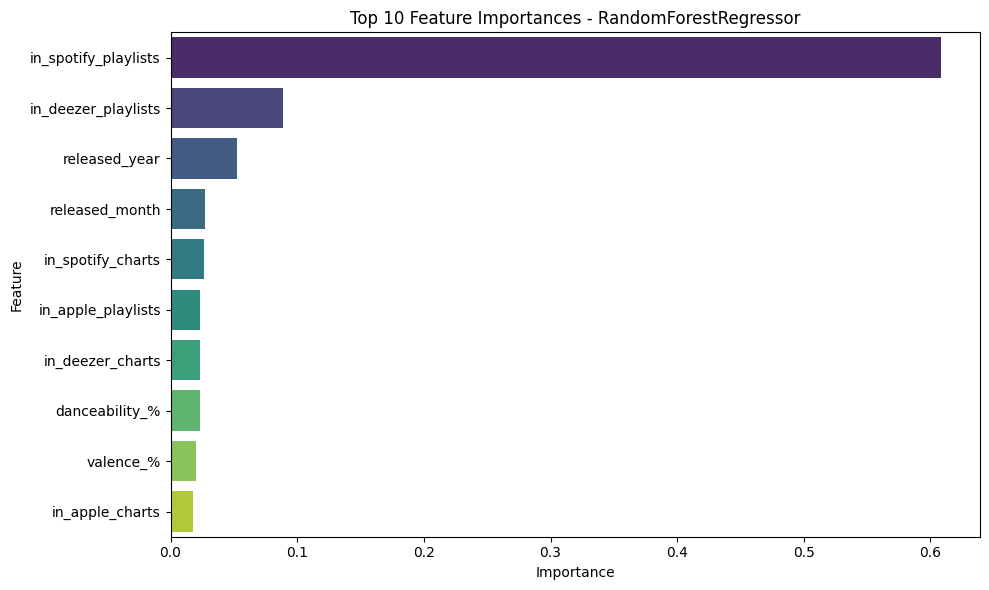

In [55]:
plot_feature_importance(models_after_transform[1], X_train)

In this graph, the most dominant feature is:

- in_spotify_playlists: This has the highest importance by far. The model heavily relied on how many Spotify playlists a song is in. That tells us playlist exposure is a major driver of streams.

Other useful features:

- in_deezer_playlists, released_year, and in_spotify_charts also contribute, but much less compared to in_spotify_playlists.

- Some audio features like danceability_% and valence_% made it into the top 10, which shows they still matter but are not as impactful as platform presence.

C:\Users\HP\AppData\Local\Temp\ipykernel_18860\84476977.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


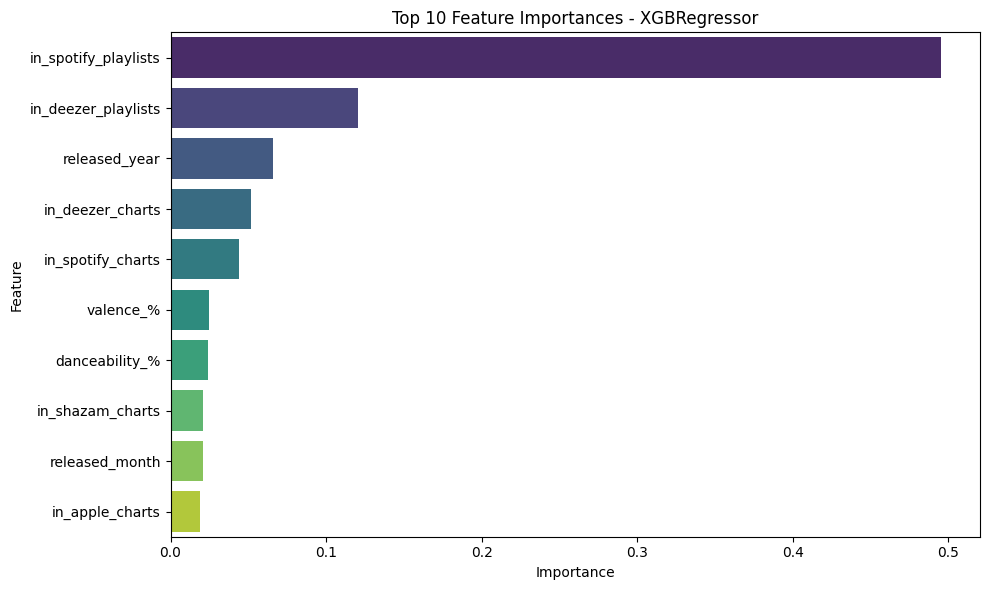

In [56]:
plot_feature_importance(models_after_transform[2], X_train)  # XGBoost

Same story here, the top feature again is:

- in_spotify_playlists, followed by

- in_deezer_playlists, released_year, and platform chart presence features.

From both models, we can conclude:

- Platform presence (especially Spotify) is the strongest predictor of a song’s success.

- Audio features are helpful but secondary.

- When planning promotions, focus first on playlist reach, then fine-tune the song characteristics.

In [60]:
import joblib
# Assuming rf_model_log is your best model after the log transformation
# Save the model
joblib.dump(models_after_transform[1], "best_model.pkl")


['best_model.pkl']